In [1]:
############################################第三天 重复网络的构建############################################
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#导入influence数据集
df_infl = pd.read_csv('influence_data.csv',encoding = 'utf8')

#删除艺术家名字的列，因为我们只用id来代表艺术家
df_infl = df_infl.drop(columns = ['influencer_name','follower_name'])

#构造图：
DG = nx.DiGraph()
for index,row in df_infl.iterrows():
    #连出来有向边：
    DG.add_edges_from([(row['influencer_id'], row['follower_id'])])
    #为节点赋‘genre’属性
    DG.nodes[row['influencer_id']]['genre'] = row['influencer_main_genre']
    DG.nodes[row['follower_id']]['genre'] = row['follower_main_genre']
    #为节点赋‘active_start’属性
    DG.nodes[row['influencer_id']]['active_start'] = row['influencer_active_start']
    DG.nodes[row['follower_id']]['active_start'] = row['follower_active_start']

#为图的边赋值，假如是跨界影响，就为cross赋1，反之赋0
for index,row in df_infl.iterrows():
    if DG.nodes[row['influencer_id']]['genre'] == DG.nodes[row['follower_id']]['genre']:
        DG.edges[row['influencer_id'],row['follower_id']]['cross'] = 0
        #break
    else:
        DG.edges[row['influencer_id'],row['follower_id']]['cross'] = 1

In [ ]:
#读取artist数据：
df_art = pd.read_csv('data_by_artist.csv')

In [ ]:
import math
#定义一个函数，将某一列按照count进行加权标准化,输入数据集，想要标准化的列column，以及权重列weight（str格式）
def standard(df, column, weight):
    mean = (df[column] * df[weight]).sum()/df[weight].sum()
    std = math.sqrt( ((df[column] - mean)**2  * df[weight]).sum()/df[weight].sum() )
    df[column] = (df[column]-mean)/std

In [ ]:
columns_need = ['danceability','energy','valence','tempo','loudness','mode','key','acousticness','instrumentalness','liveness','speechiness']
for column in columns_need:
    standard(df_art,column,'count')
df_art.set_index(['artist_id'], inplace=True)

In [6]:
#导入昨天的数据
df_art_vector = pd.read_csv('df_art_vector.csv',header=0,index_col=0)
genre_music = pd.read_csv('genre_music.csv',header=0,index_col=0)
people_genre = pd.read_csv('people_genre.csv',header=0,index_col=0)

In [5]:
df_art_vector.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,3,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,3,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
25462,14,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294,12.0
335,3,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,3,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0


In [7]:
genre_music.head()

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness
Avant-Garde,-0.072377,-1.337016,-0.528730,-0.575967,-1.257527,0.239374,0.289567,1.189117,0.447728,-0.566223,-0.123118
Country,0.500868,-0.225833,0.396067,0.050382,-0.004614,0.319483,0.274488,0.214315,-0.432012,-0.261849,-0.347193
Easy Listening,-0.808890,-0.933818,-0.788350,-0.701964,-0.923116,0.233112,-0.265264,1.036628,2.011646,-0.477688,-0.320875
Pop/Rock,-0.166688,0.535008,-0.016956,0.376248,0.386665,0.136231,0.055458,-0.552302,-0.166489,0.146354,-0.082107
R&B;,0.854106,0.045450,0.470835,-0.215098,0.241278,-0.482380,-0.064784,-0.213138,-0.451107,-0.201333,0.224317


In [8]:
people_genre.head()

,genre
759491,Pop/Rock
74,Pop/Rock
25462,Electronic
335,Pop/Rock
66915,Pop/Rock


In [27]:
#################### KNN #######################
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
df = df_art_vector

In [29]:
#分开features和class：
x_data = df.drop(['genre','count'],axis=1)
y_data = df['genre']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['danceability', 'energy', 'valence', 'tempo', 'loudness',
       'mode', 'key','acousticness', 'instrumentalness', 'liveness',
       'speechiness'])

In [30]:
# 这里采用后边调参得到的最优参数:13,1,1
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.1, random_state = 1)
knn_clf=KNeighborsClassifier(n_neighbors = 13 , weights = 'distance',algorithm = 'brute', p = 1)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[  0   0   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0]
 [  0  11   0  22   7   0   0   0   0   0   2   0   0   0   0   3   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   6   0 255  13   0   1   0   0   0   4   0   2   1   0   2   1   0]
 [  0   1   0  28  30   0   0   0   0   0   1   0   0   0   0   1   0   1]
 [  0   0   0   4   0   0   0   0   0   0   1   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   4   1   0   0   0   0   0   1   0   0   0   0   2   0   0]
 [  0   2   0   4   2   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   1   0   0   1   0   0   0   0   0   1   0   0]
 [  0   2   0   6   2   0   1   0   0   0  24   0   1   0   0   1   0   0]
 [  0   0   0   1   1   1   0   0   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   2   0   0]
 [  0  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
def para(size,n,p):
    X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size = size , random_state = 1)
    knn_clf=KNeighborsClassifier(n_neighbors = n , weights = 'distance',algorithm = 'kd_tree' , p = p)
    knn_clf.fit(X_train,y_train)
    ypred=knn_clf.predict(X_test) #These are the predicted output values
    result = confusion_matrix(y_test, ypred)
#print('Confusion Matrix:')
#print(result)
#result1 = classification_report(y_test, ypred)
#print('Classification Report:',)
#print (result1)
    result2 = accuracy_score(y_test,ypred)
#print('Accuracy:',result2)
    return result2

In [33]:
for size in range(1,4):
    for n in range(4,16):
        for p in range(1,4):
            t = para(size/10,n,p)
            #if t >= 0.75:
            print([size,n,p],t)

[1, 4, 1] 0.5828877005347594
[1, 4, 2] 0.5561497326203209
[1, 4, 3] 0.5418894830659536
[1, 5, 1] 0.5846702317290553
[1, 5, 2] 0.5543672014260249
[1, 5, 3] 0.5383244206773619
[1, 6, 1] 0.5757575757575758
[1, 6, 2] 0.5472370766488414
[1, 6, 3] 0.5347593582887701
[1, 7, 1] 0.5882352941176471
[1, 7, 2] 0.5650623885918004
[1, 7, 3] 0.5276292335115864
[1, 8, 1] 0.5900178253119429
[1, 8, 2] 0.5721925133689839
[1, 8, 3] 0.5490196078431373
[1, 9, 1] 0.5989304812834224
[1, 9, 2] 0.5864527629233511
[1, 9, 3] 0.5739750445632799
[1, 10, 1] 0.6007130124777184
[1, 10, 2] 0.5757575757575758
[1, 10, 3] 0.5757575757575758
[1, 11, 1] 0.6096256684491979
[1, 11, 2] 0.5828877005347594
[1, 11, 3] 0.5757575757575758
[1, 12, 1] 0.6096256684491979
[1, 12, 2] 0.5704099821746881
[1, 12, 3] 0.5900178253119429
[1, 13, 1] 0.6131907308377896
[1, 13, 2] 0.5828877005347594
[1, 13, 3] 0.5811051693404634
[1, 14, 1] 0.6078431372549019
[1, 14, 2] 0.5882352941176471
[1, 14, 3] 0.5828877005347594
[1, 15, 1] 0.606060606060606

In [47]:
##################################接下来探究不同流派随时间尺度的变化#############################
#建立所有的年份集：
#active_start_set = set()
#for node in DG.nodes:
#    active_start_set.add(DG.nodes[node]['active_start'])

In [56]:
active_start_list = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

In [57]:
genres_list = ['Avant-Garde', 'Country', 'Easy Listening', 'Pop/Rock', 'R&B;', \
               'Folk', 'New Age', 'International', 'Blues', 'Classical', 'Jazz', \
               'Comedy/Spoken', 'Unknown', 'Stage & Screen', 'Electronic', 'Religious', 'Vocal', 'Reggae', "Children's", 'Latin']

In [59]:
#建立流派间 按年份 的 艺术家人数 矩阵的初始化，接下来为其循环赋值：
genre_arti_year = pd.DataFrame(np.zeros((20,9)),index = genres_list, columns = active_start_list)

In [60]:
genre_arti_year.head()

,1930,1940,1950,1960,1970,1980,1990,2000,2010
Avant-Garde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Easy Listening,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pop/Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R&B;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#计算每个entry上累计的数目
for node in DG.nodes:
    genre_arti_year.loc[DG.nodes[node]['genre'],DG.nodes[node]['active_start']] += 1

In [62]:
#genre_arti_year

,1930,1940,1950,1960,1970,1980,1990,2000,2010
Avant-Garde,0.0,1.0,1.0,3.0,2.0,0.0,2.0,2.0,0.0
Country,14.0,32.0,60.0,51.0,60.0,42.0,74.0,45.0,25.0
Easy Listening,3.0,7.0,7.0,3.0,1.0,0.0,1.0,0.0,1.0
Pop/Rock,1.0,2.0,103.0,410.0,419.0,612.0,665.0,480.0,116.0
R&B;,1.0,17.0,104.0,128.0,109.0,81.0,114.0,80.0,43.0
Folk,6.0,7.0,22.0,31.0,12.0,7.0,8.0,2.0,0.0
New Age,0.0,0.0,0.0,3.0,12.0,11.0,6.0,6.0,0.0
International,2.0,8.0,9.0,20.0,17.0,11.0,10.0,4.0,0.0
Blues,17.0,20.0,35.0,15.0,8.0,4.0,2.0,0.0,0.0
Classical,3.0,6.0,4.0,6.0,2.0,2.0,4.0,0.0,1.0


<Figure size 432x288 with 0 Axes>

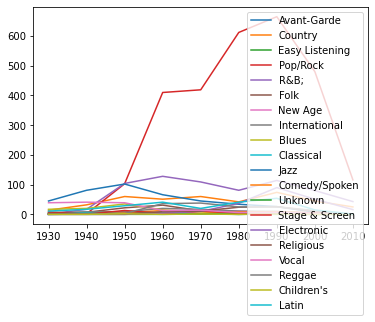

In [63]:
plt.figure()
genre_arti_year.T.plot()
plt.legend(loc='best')

In [65]:
genre_arti_year = genre_arti_year.T

In [74]:
genre_arti_year

,Avant-Garde,Country,Easy Listening,Pop/Rock,R&B;,Folk,New Age,International,Blues,Classical,Jazz,Comedy/Spoken,Unknown,Stage & Screen,Electronic,Religious,Vocal,Reggae,Children's,Latin
1930,0.0,14.0,3.0,1.0,1.0,6.0,0.0,2.0,17.0,3.0,45.0,2.0,0.0,8.0,0.0,3.0,39.0,0.0,0.0,11.0
1940,1.0,32.0,7.0,2.0,17.0,7.0,0.0,8.0,20.0,6.0,81.0,1.0,0.0,1.0,0.0,3.0,41.0,1.0,0.0,17.0
1950,1.0,60.0,7.0,103.0,104.0,22.0,0.0,9.0,35.0,4.0,102.0,5.0,0.0,13.0,0.0,2.0,39.0,3.0,2.0,29.0
1960,3.0,51.0,3.0,410.0,128.0,31.0,3.0,20.0,15.0,6.0,66.0,13.0,0.0,3.0,4.0,9.0,13.0,36.0,0.0,41.0
1970,2.0,60.0,1.0,419.0,109.0,12.0,12.0,17.0,8.0,2.0,45.0,3.0,1.0,11.0,10.0,11.0,14.0,38.0,1.0,20.0
1980,0.0,42.0,0.0,612.0,81.0,7.0,11.0,11.0,4.0,2.0,34.0,8.0,2.0,4.0,37.0,24.0,6.0,25.0,0.0,41.0
1990,2.0,74.0,1.0,665.0,114.0,8.0,6.0,10.0,2.0,4.0,26.0,9.0,0.0,5.0,90.0,26.0,7.0,25.0,1.0,54.0
2000,2.0,45.0,0.0,480.0,80.0,2.0,6.0,4.0,0.0,0.0,7.0,5.0,0.0,5.0,51.0,10.0,3.0,13.0,0.0,15.0
2010,0.0,25.0,1.0,116.0,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,1.0,0.0,0.0,0.0,1.0


In [81]:
#############决定用流派内音乐家的人数说明问题，但有些流派实在太菜，故扔掉############
genre_arti_year_droped = genre_arti_year.drop(columns = ['Avant-Garde', "Children's", 'Unknown'])

In [84]:
genre_arti_year_droped.to_csv('genre_arti_year_droped.csv')

In [82]:
abs(genre_arti_year_droped.corr()) > 0.6

,Country,Easy Listening,Pop/Rock,R&B;,Folk,New Age,International,Blues,Classical,Jazz,Comedy/Spoken,Stage & Screen,Electronic,Religious,Vocal,Reggae,Latin
Country,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,True
Easy Listening,False,True,True,False,False,True,False,True,True,True,False,False,False,False,True,False,False
Pop/Rock,True,True,True,True,False,True,False,True,False,False,True,False,True,True,True,True,True
R&B;,True,False,True,True,True,False,True,False,False,False,True,False,False,False,False,True,True
Folk,False,False,False,True,True,False,True,False,True,True,True,False,False,False,False,False,False
New Age,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False
International,True,False,False,True,True,False,True,False,False,False,True,False,False,False,False,True,True
Blues,False,True,True,False,False,False,False,True,True,True,False,False,True,False,True,False,False
Classical,False,True,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False
Jazz,False,True,False,False,True,False,False,True,True,True,False,False,False,False,True,False,False


In [85]:
genre_arti_year.corr().to_csv('genre_arti_year_corr.csv')

### 发现的流派之间的关系：
1、pop/rock 与 easy listening 呈负相关，easy listening 在前期兴盛，pop/rock在后期兴盛，这是符合音乐史的，https://en.wikipedia.org/wiki/Easy_listening
我们猜测这可能也与electronic的兴起有关，为pop/rock的兴起奠定基础

2、jazz和R&B同步兴起，这可能是因为jazz是rooted from R&B 
https://en.wikipedia.org/wiki/Jazz

In [73]:
genre_arti_year.sum()

Avant-Garde         11.0
Country            403.0
Easy Listening      23.0
Pop/Rock          2808.0
R&B;               677.0
Folk                95.0
New Age             38.0
International       81.0
Blues              101.0
Classical           28.0
Jazz               406.0
Comedy/Spoken       46.0
Unknown              3.0
Stage & Screen      50.0
Electronic         208.0
Religious           89.0
Vocal              162.0
Reggae             141.0
Children's           4.0
Latin              229.0
dtype: float64

In [68]:
#建立流派间 按年份 的 歌曲数目 矩阵的初始化，接下来为其循环赋值：
genre_song_year = pd.DataFrame(np.zeros((20,9)),index = genres_list, columns = active_start_list)
#计算每个entry上累计的数目
for node in DG.nodes:
    if node == 477787: #(把这个无流派的老哥剔除掉)
        continue
    genre_song_year.loc[DG.nodes[node]['genre'],DG.nodes[node]['active_start']] += df_art_vector.loc[node, 'count']

In [69]:
genre_song_year = genre_song_year.T

,1930,1940,1950,1960,1970,1980,1990,2000,2010
Avant-Garde,0.0,2.0,42.0,69.0,28.0,0.0,322.0,18.0,0.0
Country,554.0,1395.0,4785.0,1816.0,2087.0,1101.0,2711.0,1136.0,429.0
Easy Listening,260.0,637.0,555.0,188.0,8.0,0.0,8.0,0.0,24.0
Pop/Rock,12.0,120.0,7277.0,28163.0,19872.0,16097.0,13858.0,9686.0,2289.0
R&B;,16.0,604.0,4573.0,5813.0,2746.0,1788.0,2916.0,2071.0,860.0
Folk,327.0,299.0,819.0,1059.0,128.0,86.0,67.0,5.0,0.0
New Age,0.0,0.0,0.0,25.0,172.0,244.0,36.0,54.0,0.0
International,39.0,394.0,1118.0,448.0,116.0,58.0,274.0,326.0,0.0
Blues,521.0,909.0,634.0,300.0,70.0,50.0,11.0,0.0,0.0
Classical,69.0,1848.0,77.0,108.0,14.0,6.0,56.0,0.0,938.0


<Figure size 432x288 with 0 Axes>

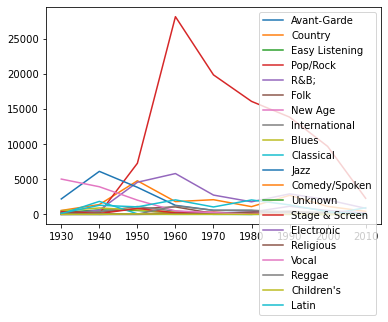

In [70]:
plt.figure()
genre_song_year.T.plot()
plt.legend(loc='best')

In [71]:
genre_song_year.T.sum()

Avant-Garde         481.0
Country           16014.0
Easy Listening     1680.0
Pop/Rock          97374.0
R&B;              21387.0
Folk               2790.0
New Age             531.0
International      2773.0
Blues              2495.0
Classical          3116.0
Jazz              14733.0
Comedy/Spoken       664.0
Unknown              26.0
Stage & Screen     2104.0
Electronic         2505.0
Religious          1365.0
Vocal             11941.0
Reggae             2859.0
Children's          102.0
Latin              9418.0
dtype: float64

In [78]:
genre_song_year.T.corr()

,Avant-Garde,Country,Easy Listening,Pop/Rock,R&B;,Folk,New Age,International,Blues,Classical,Jazz,Comedy/Spoken,Unknown,Stage & Screen,Electronic,Religious,Vocal,Reggae,Children's,Latin
Avant-Garde,1.000000,0.383533,-0.238000,0.281615,0.322871,-0.050295,-0.126651,0.097414,-0.282636,-0.253834,-0.267215,-0.060479,-0.202834,-0.076743,0.833904,0.634940,-0.283020,0.128261,0.327526,0.251177
Country,0.383533,1.000000,0.405127,0.210243,0.670540,0.498181,-0.119091,0.871582,0.257125,-0.260085,0.288814,0.204770,-0.184068,0.752234,0.069921,-0.017556,-0.066223,0.013762,0.946854,0.315153
Easy Listening,-0.238000,0.405127,1.000000,-0.437711,0.024658,0.538009,-0.522168,0.651951,0.973676,0.547382,0.973392,0.233066,-0.303292,0.550617,-0.578464,-0.448464,0.729387,-0.313932,0.392686,0.070091
Pop/Rock,0.281615,0.210243,-0.437711,1.000000,0.768471,0.361667,0.489408,0.037447,-0.443705,-0.543736,-0.447315,0.711082,0.237211,-0.068252,0.213583,0.185266,-0.626618,0.937853,-0.030594,0.701292
R&B;,0.322871,0.670540,0.024658,0.768471,1.000000,0.727247,0.006649,0.626400,-0.081611,-0.446018,-0.100830,0.651010,-0.111518,0.394292,0.062501,-0.097255,-0.432762,0.662368,0.484549,0.578927
Folk,-0.050295,0.498181,0.538009,0.361667,0.727247,1.000000,-0.344205,0.669519,0.508792,-0.107297,0.411749,0.730897,-0.238009,0.603664,-0.479204,-0.317604,0.231608,0.457688,0.371097,0.429584
New Age,-0.126651,-0.119091,-0.522168,0.489408,0.006649,-0.344205,1.000000,-0.372170,-0.483195,-0.388949,-0.403646,0.193545,0.829779,-0.239843,0.133101,0.377928,-0.471090,0.426792,-0.205010,0.464269
International,0.097414,0.871582,0.651951,0.037447,0.626400,0.669519,-0.372170,1.000000,0.503168,-0.044126,0.515057,0.261055,-0.291450,0.735523,-0.187717,-0.334967,0.120800,-0.069010,0.818646,0.226111
Blues,-0.282636,0.257125,0.973676,-0.443705,-0.081611,0.508792,-0.483195,0.503168,1.000000,0.545754,0.976362,0.271362,-0.274425,0.491430,-0.620681,-0.374002,0.841439,-0.272944,0.236437,0.065005
Classical,-0.253834,-0.260085,0.547382,-0.543736,-0.446018,-0.107297,-0.388949,-0.044126,0.545754,1.000000,0.637255,-0.049585,-0.218251,-0.301532,-0.313643,-0.503530,0.379909,-0.356657,-0.256360,-0.116839


In [86]:
##################################################    第 四问#   #########################################

In [87]:
DG.in_degree(41874)

13

In [277]:
#计算影响者大于等于10个人的最终选择，他是否选择了影响最多的那个流派
really = 0
notreally = 0
total = 0
for node in DG.nodes:
    if node == 477787: #(把这个无流派的老哥剔除掉)
        continue
    if DG.in_degree(node) >= 3:
        list = []
        for node1 in DG.predecessors(node):
            list.append(DG.nodes[node1]['genre'])
        genre_pre = max(list,key=list.count)
        if genre_pre == DG.nodes[node]['genre']:
            really += 1
        else:
            notreally += 1
    total += 1


In [278]:
#输出最终结果：
[total,really,notreally]

[5602, 3315, 597]

In [135]:
#记录我们作为特征的变量：
columns_need = ['danceability', 'energy', 'valence', 'tempo', 'loudness',
       'mode', 'key','acousticness', 'instrumentalness', 'liveness',
       'speechiness']

In [175]:
from sklearn.metrics.pairwise import cosine_similarity
#计算影响者是否真的影响了被影响者的音乐
in_count = 0
total = 0
arti_really_infl_dict = {}
for node in DG.nodes:
    if node == 477787: #(把这个无流派的老哥剔除掉)
        continue
    if DG.in_degree(node) >= 20:
        #构建出影响node这个人的所有人的dataframe
        df = pd.DataFrame(np.zeros((0,13)), columns = df_art_vector.columns)
        for node1 in DG.predecessors(node):
            df = df.append(pd.DataFrame(df_art_vector.loc[node1,:]).T)
        #对这个dataframe按歌手人数加权平均，得到平均影响
        node1_inflencer_aver = []
        for column in columns_need:
            mean = (df[column] * df['count']).sum()/df['count'].sum()
            node1_inflencer_aver.append(mean)
        #将新算出的相似度放入字典
        arti_really_infl_dict[node] = cosine_similarity([np.array(node1_inflencer_aver)], \
                                                        [np.array(df_art_vector.loc[node][columns_need])])[0,0]
        in_count += 1
    total += 1

In [129]:
#pd.DataFrame(df_art_vector.loc[74,:]).T.append(pd.DataFrame(df_art_vector.loc[335,:]).T)

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
74,3.0,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
335,3.0,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0


In [133]:
#pd.DataFrame(np.zeros((0,13)), columns = df_art_vector.columns).append(pd.DataFrame(df_art_vector.loc[335,:]).T)

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
335,3.0,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0


In [150]:
df_art_vector.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,3,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,3,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
25462,14,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294,12.0
335,3,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,3,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0


In [168]:
#np.array(df_art_vector.loc[335][columns_need])

In [183]:
arti_music_really_infl_df = pd.DataFrame.from_dict(arti_really_infl_dict,orient='index')
arti_music_really_infl_df.columns = ['extent_of_music_infl']

In [164]:
#np.array([[3]])[0,0]

3

In [181]:
#真正被纳入计算音乐是否被真正影响的in_count = 390
[total,in_count]

[5602, 390]

In [184]:
arti_music_really_infl_df

,extent_of_music_infl
335,-0.366835
66915,0.341200
397880,0.103541
492331,0.692644
755156,0.738695
...,...
861252,0.238363
862855,-0.141391
885569,0.191373
948625,-0.021120


In [185]:
#这里画出来影响程度的直方图，横坐标[-1,1]，纵坐标为频数
arti_music_really_infl_df.to_csv('arti_music_really_infl_df.csv')

In [206]:
###################################计算特征的传染性characteristic contagiosity#################

###########去掉空行傻逼节点：477787
DG.remove_node(477787)


In [207]:
#对边遍历，将差值绝对值向量求和
character_error = np.array([0]*11)
for (u,v) in DG.edges:
    character_error = character_error + np.absolute( np.array(df_art_vector.loc[u][columns_need])  \
                                                    - np.array(df_art_vector.loc[v][columns_need]) )

In [196]:
df_art_vector.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,3,-1.515680,1.573360,-0.741129,1.499143,0.861288,0.324377,0.583027,-1.310069,-0.605288,0.584144,1.795095,14.0
74,3,0.453663,1.599803,-0.308228,-0.178583,0.934704,0.324377,1.137660,-1.346828,-0.616202,2.199470,-0.347748,2.0
25462,14,0.896786,0.459166,0.135024,-1.269126,-0.035169,0.324377,-1.358188,-0.658080,0.295232,-0.587057,1.349294,12.0
335,3,0.112353,-0.203076,-0.278974,0.643635,-0.435323,0.324377,-1.358188,-0.785885,0.086532,-0.892882,-0.510862,33.0
66915,3,-0.141841,-0.285624,0.106897,0.638965,-0.111472,0.324377,0.583027,0.516939,-0.455130,1.421072,0.026339,1092.0


In [222]:
character_error

array([37716.22033265, 31049.01806775, 41125.56050407, 54621.81427549,
       33730.72435188, 27421.22465131, 48593.32380589, 27887.44409911,
       26451.79392428, 49821.79828959, 24067.36304999])

In [223]:
columns_need

['danceability',
 'energy',
 'valence',
 'tempo',
 'loudness',
 'mode',
 'key',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness']

In [228]:
d = pd.DataFrame(1.5 - 10*character_error/sum(character_error)).T
d.columns = columns_need
d.index = ['characteristic_contagiosity']
d.to_csv('characteristic_contagiosity.csv')
d

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness
characteristic_contagiosity,0.562919,0.72857,0.478212,0.14289,0.661941,0.818704,0.292671,0.807121,0.84279,0.262149,0.902033


In [234]:
#将不同流派的音乐家人数导出
pd.DataFrame(people_genre.loc[:,'genre'].value_counts()).to_csv('genre_artist_summary.csv')

In [231]:
people_genre

,genre
759491,Pop/Rock
74,Pop/Rock
25462,Electronic
335,Pop/Rock
66915,Pop/Rock
...,...
3661738,Pop/Rock
261309,Reggae
3670556,R&B;
2518003,Reggae


In [ ]:
############################################第五题###############################################
##########################计算每个流派的音乐平均值（不标准化）##########################

In [235]:
genres_list

['Avant-Garde',
 'Country',
 'Easy Listening',
 'Pop/Rock',
 'R&B;',
 'Folk',
 'New Age',
 'International',
 'Blues',
 'Classical',
 'Jazz',
 'Comedy/Spoken',
 'Unknown',
 'Stage & Screen',
 'Electronic',
 'Religious',
 'Vocal',
 'Reggae',
 "Children's",
 'Latin']

In [245]:
df_art.head()

,genre,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,count
759491,Pop/Rock,0.361714,0.859571,0.419286,135.678000,-7.351286,1.0,7.0,0.036975,0.004043,0.248743,0.152171,14.0
74,Pop/Rock,0.578000,0.865000,0.487000,117.114000,-7.062000,1.0,9.0,0.026400,0.001850,0.365000,0.046000,2.0
25462,Electronic,0.626667,0.630833,0.556333,105.047167,-10.883667,1.0,0.0,0.224538,0.184969,0.164450,0.130083,12.0
335,Pop/Rock,0.540515,0.494879,0.491576,126.211818,-12.460424,1.0,0.0,0.187772,0.143038,0.142439,0.037918,33.0
66915,Pop/Rock,0.512598,0.477932,0.551934,126.160149,-11.184330,1.0,7.0,0.562567,0.034211,0.308978,0.064535,1092.0


In [242]:
#读取artist数据：
df_art = pd.read_csv('data_by_artist.csv')

In [244]:
df_art.set_index(['artist_id'], inplace=True)
df_art = people_genre.join(df_art)
df_art =  df_art.drop(columns = ['artist_name','duration_ms','popularity'])
df_art_grouped = df_art.groupby(by = ['genre'])

In [247]:
#计算流派的音乐特色向量，按流派内的歌手作品数加权,得到流派对应的音乐特征向量字典：
genre_music_unsta = {}
for genre in genres_list:
    df_vector_genre = df_art_grouped.get_group(genre)
    genre_vector = []
    for column in columns_need:
        mean = (df_vector_genre[column] * df_vector_genre['count']).sum()/df_vector_genre['count'].sum()
        genre_vector.append(mean)
    genre_music_unsta[genre] = genre_vector
genre_music_unsta = pd.DataFrame(genre_music_unsta)

In [249]:
#得到各个流派的音乐特点向量dataframe
genre_music_unsta = genre_music_unsta.T
genre_music_unsta.columns = ['danceability','energy','valence','tempo','loudness','mode', \
                       'key','acousticness','instrumentalness','liveness','speechiness']

In [250]:
genre_music_unsta

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness
Avant-Garde,0.520227,0.262087,0.452509,112.716950,-15.700214,0.975052,5.941788,0.755939,0.215607,0.165949,0.057130
Country,0.583184,0.490207,0.597166,119.647487,-10.763267,0.998564,5.887411,0.475508,0.038856,0.187856,0.046027
Easy Listening,0.439338,0.344861,0.411899,111.322797,-14.382511,0.973214,3.941071,0.712071,0.529819,0.172321,0.047331
Pop/Rock,0.509869,0.646403,0.532561,123.253194,-9.221479,0.944780,5.097593,0.254968,0.092203,0.217235,0.059162
R&B;,0.621979,0.545900,0.608861,116.709961,-9.794361,0.763221,4.664001,0.352539,0.035020,0.192211,0.074344
Folk,0.528272,0.282054,0.520422,116.024032,-15.067411,0.960573,5.377778,0.747692,0.071949,0.186921,0.065671
New Age,0.374323,0.207037,0.217046,111.158358,-18.820277,0.873823,2.698682,0.854335,0.721713,0.143952,0.045146
International,0.564802,0.427449,0.636471,116.273018,-11.876792,0.943743,2.656329,0.694778,0.157876,0.212965,0.093777
Blues,0.571612,0.446185,0.653769,117.824722,-11.551810,0.928657,4.803206,0.616440,0.083022,0.210802,0.065554
Classical,0.343753,0.189033,0.368471,106.958856,-19.931214,0.987805,5.484596,0.939787,0.546941,0.187388,0.063228


In [251]:
genre_music_unsta.to_csv('genre_music_unsta.csv')

In [252]:
#################################找到jazz,R&B,Pop\Rock,Electronic里的revolutioner##################################
infl_value = pd.read_csv('infl_value.csv',header=0,index_col=0)

In [253]:
infl_value.head()

,infl_value
754032,1.000000
66915,0.671163
894465,0.575018
531986,0.405876
354105,0.392801


In [255]:
people_genre_infl_value = people_genre.join(infl_value)

In [256]:
people_genre_infl_value.head()

,genre,infl_value
759491,Pop/Rock,0.021222
74,Pop/Rock,0.000076
25462,Electronic,0.020994
335,Pop/Rock,0.034506
66915,Pop/Rock,0.671163


In [257]:
people_genre_infl_value_grouped = people_genre_infl_value.groupby(by = ['genre'])


In [260]:
P_R = people_genre_infl_value_grouped.get_group('Pop/Rock').sort_values('infl_value',ascending = False)

In [261]:
P_R.head()

,genre,infl_value
754032,Pop/Rock,1.000000
66915,Pop/Rock,0.671163
894465,Pop/Rock,0.575018
531986,Pop/Rock,0.405876
354105,Pop/Rock,0.392801


In [262]:
R_B = people_genre_infl_value_grouped.get_group('R&B;').sort_values('infl_value',ascending = False)
R_B.head()

,genre,infl_value
128099,R&B;,0.323406
316834,R&B;,0.294868
238115,R&B;,0.246285
46861,R&B;,0.234369
622805,R&B;,0.226558


In [263]:
J_z = people_genre_infl_value_grouped.get_group('Jazz').sort_values('infl_value',ascending = False)
J_z.head()

,genre,infl_value
423829,Jazz,0.288143
175553,Jazz,0.230552
211758,Jazz,0.157637
317093,Jazz,0.149178
287604,Jazz,0.129445


In [264]:
E_l = people_genre_infl_value_grouped.get_group('Electronic').sort_values('infl_value',ascending = False)
E_l.head()

,genre,infl_value
104714,Electronic,0.188959
387815,Electronic,0.062950
2411,Electronic,0.056101
378288,Electronic,0.055475
921306,Electronic,0.038822


这里我们挑了这四个流派各自的前两名作为revolutioner

#### Electronic
104714 : Kraftwerk https://zh.wikipedia.org/wiki/%E7%99%BC%E9%9B%BB%E5%BB%A0%E6%A8%82%E5%9C%98 他们对二十世纪下半叶电子音乐的影响力是顶级的。
387815 : Neu! https://www.groenland.com/artist/neu/

#### Jazz
423829 : Miles Davis https://zh.wikipedia.org/wiki/%E9%82%81%E7%88%BE%E5%A3%AB%C2%B7%E6%88%B4%E7%B6%AD%E6%96%AF
175553 : John Coltrane 柯川影响了无数的音乐人，在爵士历史中他一直都是最具影响力的乐手之一。在2007年柯川被授与普利策奖特别奖。

#### R&B;
128099 : James Brown https://zh.wikipedia.org/wiki/%E8%A9%B9%E5%A7%86%E5%A3%AB%C2%B7%E5%B8%83%E6%9C%97
316834 : Marvin Gaye https://zh.wikipedia.org/wiki/%E9%A9%AC%E6%96%87%C2%B7%E7%9B%96%E4%BC%8A 有“摩城王子”和“灵魂乐王子”的美称。

#### Pop/Rock
754032 : The Beatles https://zh.wikipedia.org/wiki/%E6%8A%AB%E9%A0%AD%E5%9B%9B%E6%A8%82%E9%9A%8A
66915 : Bob Dylan https://zh.wikipedia.org/wiki/%E9%B2%8D%E5%8B%83%C2%B7%E8%BF%AA%E4%BC%A6

### 第五问思路
Identify if there are characteristics that might signify revolutions (major leaps) in musical
evolution from these data? What artists represent revolutionaries (influencers of major
change) in your network?

#### 第一部分：
当然有，从九宫格的图可以看出来，在20世纪50年代，energy,loudness,acousticness,instrumentalness,speechiness发生了很大的变化。

说明50年代有大事发生，事实上查阅资料知，这时候摇滚乐逐渐代替前几十年火热的jazz，同时，随着电子技术的进步，Electronic也开始大红，同时，这一时期R&B也开始火起来。

这正好和我们画的折线图是契合的（那个有放大的折线图）。

同时，比较刚才提到的流派：jazz，Electronic，R&B，Pop/Rock；   与提到的音乐特征：energy,loudness,acousticness,instrumentalness,speechiness
我们可以做出一个雷达图，这与之前的两个图体现的信息完全符合！

#### 第二部分：
即刚才提到的八个音乐家。这四个流派里按我们第一问定出的infl_value在各自的流派内排名取前两名，即是revolutioner，查阅相关资料，发现也契合！


In [279]:
#############################################第六题########################################
#选这个genre为pop/rock，建立其影响矩阵，纵轴坐标为时间，横坐标为流派，entry表示某事件被某流派影响的次数
#建立pop\rock的年份与影响流派的初始化 矩阵，接下来为其循环赋值：
P_R_influencer_genre_year = pd.DataFrame(np.zeros((20,9)),index = genres_list, columns = active_start_list)

In [280]:
P_R_influencer_genre_year.head()

,1930,1940,1950,1960,1970,1980,1990,2000,2010
Avant-Garde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Country,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Easy Listening,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pop/Rock,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R&B;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
#计算影响者是否真的影响了被影响者的音乐
total = 0
for node in DG.nodes:
    if node == 477787: #(把这个无流派的老哥剔除掉)
        continue
    if DG.nodes[node]['genre'] == 'Pop/Rock':
        for node1 in DG.predecessors(node):
            P_R_influencer_genre_year.loc[DG.nodes[node1]['genre'],DG.nodes[node1]['active_start']] += 1 
    total += 1

In [285]:
DG.nodes[27916]['genre']

'R&B;'

In [286]:
total

5602

In [287]:
P_R_influencer_genre_year

,1930,1940,1950,1960,1970,1980,1990,2000,2010
Avant-Garde,0.0,0.0,10.0,21.0,9.0,0.0,1.0,1.0,0.0
Country,111.0,115.0,191.0,140.0,29.0,30.0,24.0,1.0,0.0
Easy Listening,0.0,18.0,8.0,4.0,0.0,0.0,1.0,0.0,0.0
Pop/Rock,14.0,63.0,1782.0,7778.0,5363.0,4510.0,2277.0,236.0,8.0
R&B;,9.0,140.0,553.0,501.0,198.0,90.0,114.0,18.0,2.0
Folk,58.0,37.0,137.0,252.0,45.0,15.0,9.0,0.0,0.0
New Age,0.0,0.0,0.0,4.0,8.0,4.0,2.0,0.0,0.0
International,6.0,4.0,10.0,60.0,27.0,7.0,1.0,1.0,0.0
Blues,163.0,237.0,226.0,43.0,14.0,5.0,1.0,0.0,0.0
Classical,17.0,6.0,1.0,17.0,0.0,0.0,2.0,0.0,0.0


In [288]:
P_R_influencer_genre_year.to_csv('6_P_R_influencer_genre_year.csv')

https://en.wikipedia.org/wiki/Rock_music
It has its roots in 1940s and 1950s rock and roll, a style that drew heavily from the genres of blues, rhythm and blues, and from country music. Rock music also drew strongly from a number of other genres such as electric blues and folk, and incorporated influences from jazz, classical, and other musical styles. 

In [ ]:
### 找到dynamic influencer 的indicator，我们计算所有点的入度，并且猜测入度越大，影响力越大###############失败##############

In [305]:
infl_in_degree = {}
#求出入度：
for node in DG.nodes:
    if DG.nodes[node]['genre'] == 'Pop/Rock':
        infl_in_degree[node] = DG.in_degree(node)
#求出入度 dataframe：
infl_in_degree = pd.DataFrame.from_dict(infl_in_degree,orient='index')
infl_in_degree.columns = ['in_infl']

In [306]:
infl_in_degree.head()

,in_infl
759491,13
74,1
335,20
66915,29
71209,12


In [307]:
in_and_infl = infl_in_degree.join(infl_value)

In [308]:
in_and_infl.head()

,in_infl,infl_value
759491,13,0.021222
74,1,0.000076
335,20,0.034506
66915,29,0.671163
71209,12,0.114036


In [310]:
in_and_infl.corr()

,in_infl,infl_value
in_infl,1.000000,0.350375
infl_value,0.350375,1.000000


In [309]:
in_and_infl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2807 entries, 759491 to 3661738
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   in_infl     2807 non-null   int64  
 1   infl_value  2807 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 145.8 KB


In [311]:
infl_in_degree.sort_values('in_infl',ascending = False)

,in_infl
141683,47
884686,44
387530,43
758444,41
124492,40
...,...
116087,0
300035,0
840708,0
120615,0


In [312]:
infl_value.sort_values('infl_value',ascending = False)

,infl_value
754032,1.000000
66915,0.671163
894465,0.575018
531986,0.405876
354105,0.392801
...,...
96701,0.000076
96804,0.000076
343215,0.000076
93859,0.000076


In [333]:
artist_year_span = {}
#求追随者年份的极差，并设置门槛为180个一阶追随者：
for node in DG.nodes:
    if DG.out_degree(node) >= 180:
        list = []
        for node1 in DG.successors(node):
            list.append(DG.nodes[node1]['active_start'])
        artist_year_span[node] = max(list) - min(list)
            #求追随者年份极差 dataframe：
artist_year_span = pd.DataFrame.from_dict(artist_year_span, orient='index')
artist_year_span.columns = ['year_span']

In [334]:
artist_year_span.sort_values('year_span',ascending = False)

,year_span
354105,80
549797,80
66915,60
754032,60
41874,60
894465,60
100160,60
139026,50
531986,50
840402,40


In [335]:
d = artist_year_span.join(infl_value)

In [336]:
d.corr()

,year_span,infl_value
year_span,1.000000,0.007872
infl_value,0.007872,1.000000


In [337]:
d.head()

,year_span,infl_value
66915,60,0.671163
139026,50,0.364756
354105,80,0.392801
754032,60,1.000000
840402,40,0.318361


In [339]:
d.sort_values('infl_value',ascending = False)

,year_span,infl_value
754032,60,1.000000
66915,60,0.671163
894465,60,0.575018
531986,50,0.405876
354105,80,0.392801
139026,50,0.364756
100160,60,0.337910
41874,60,0.334938
549797,80,0.320584
840402,40,0.318361


In [340]:
#将我们试图口胡的表保存以便口胡：
d.sort_values('infl_value',ascending = False).to_csv('TOP10_dynamic_influencers')

In [349]:
############################   探究后期的音乐家是否更倾向于被同一代的音乐家影响(发现无明显影响，放弃)    #######################
artist_infl_by_same_year_rate = {}
#求影响者同意年代占比：
for node in DG.nodes:
    if DG.in_degree(node) >= 30:
        total = 0
        same = 0
        for node1 in DG.predecessors(node):
            if DG.nodes[node1]['active_start'] == DG.nodes[node]['active_start']:
                same += 1
            total += 1
        artist_infl_by_same_year_rate[node] = same/total
artist_infl_by_same_year_rate = pd.DataFrame.from_dict(artist_infl_by_same_year_rate, orient='index')
artist_infl_by_same_year_rate.columns = ['infl_by_same_year_rate']

In [350]:
artist_infl_by_same_year_rate.sort_values('infl_by_same_year_rate',ascending = False)

,infl_by_same_year_rate
825251,0.540541
293896,0.433333
866841,0.406250
758444,0.317073
154544,0.314286
...,...
176358,0.000000
240665,0.000000
26520,0.000000
174122,0.000000


In [353]:
genre_song_year.sum()

1930     9880.0
1940    17819.0
1950    27879.0
1960    43626.0
1970    28414.0
1980    23448.0
1990    23965.0
2000    14577.0
2010     4750.0
dtype: float64

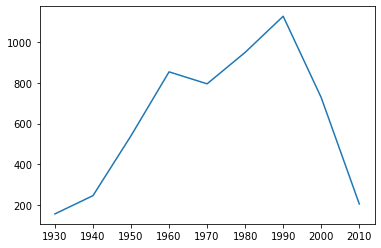

In [358]:
genre_arti_year.T.sum().plot()

In [396]:
df_full_music_year = pd.read_csv('full_music_data.csv') ['year']
df_full_music_year = pd.DataFrame(df_full_music_year)
df_full_music_year.insert(df_full_music_year.shape[1], 'Number of Songs', 1)
df_full_music_year = df_full_music_year.sort_values('year')
df_full_music_year_ = df_full_music_year.groupby(by = ['year']).sum()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


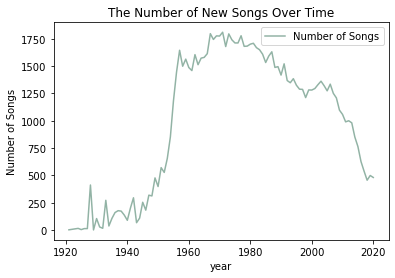

In [408]:
df_full_music_year_.plot(color='#92B3A5',linewidth=1.5,
                linestyle='-')
plt.legend(loc='best')

plt.title('The Number of New Songs Over Time')
plt.xlabel('year')
plt.ylabel('Number of Songs')

plt.legend(labels=['Number of Songs'])

plt.savefig('The Number of New Songs Over Time.eps')

In [410]:
df_full_music_year_.to_csv('6 df_full_music_year_number.csv')

### 第七题

How does your work express information about cultural influence of music in time or
circumstances? Alternatively, how can the effects of social, political or technological
changes (such as the internet) be identified within the network?

liveness稍微降低，说明随着电子技术发展，随身听等进入人们的生活，现场版音乐的市场逐渐变小，但并不显著

instrumentalness 持续降低，说明古典等纯音乐形式逐渐占比变少，流行因素变多，音乐逐渐走入寻常百姓家，走入大众生活

valence在50年代前有一个低谷，可能是因为二次世界大战，整个世界悲凉的感情基调偏多，后期和平后又逐渐回到原来水平

ernergy在50年代后暴涨，说明音乐的发泄性越来越强，受众更多是普罗大众

Danceability 同样在50年代前后出现低谷，其原因与二战相关

